Cyclostationary Signal Processing (CSP)

I hope this will illustrate some basic (and possibly crude) attempts at cyclostationary signal processing (CSP). I have come across numerous papers making claims how "cyclostationary features" can be used as, well, features for CNNs when trying to detect types of modulation (BPSK, FM, etc.). 

Not being the most familiar with CSP, I figured I would start with basic examples, perhaps BPSK and then something else. 


In [ ]:
print("Welcome to Cyclostationary Signal Processing (CSP)")

Let's generate a waveform ... 

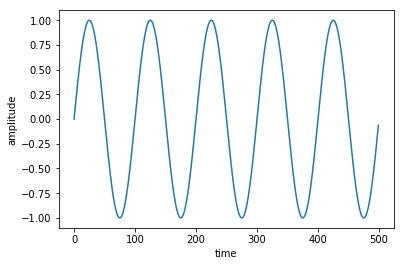

In [6]:
import matplotlib.pyplot as plt
import numpy as np


Fs = 10000
f = 100
num_cycles = 5
sample = Fs/f * num_cycles
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

I'm not sure if it's apporporate to bring this up, but again, I'm not an expert or even a frequent user of moments, cumulants, and CSP ... but I do recall "moments" from statistics and ML classes I've taken. And, I've seen in papers/websites how momments, cumulants, and CSP are related. So ... I think I will start very simple and look at some moments. Consider this an excercise for the brain if not at least some warm-ups for you experts. 

The first four moments:
1: Mean
2: Variance
3: Skewness
4: Kurtosis

In [10]:
import scipy.stats as sp

print("MEAN:", np.mean(y))
print("VARIANCE:", np.var(y))
print("SKEW:", sp.skew(y))
print("KURTOSIS:", sp.kurtosis(y))

MEAN: -7.105427357601002e-18
VARIANCE: 0.5
SKEW: -6.029155041345696e-17
KURTOSIS: -1.5


So, we can say MEAN and SKEW are zero. 

*NOTE* This is purely theoretical. A sampled waveform would be very different based on MANY things. I'm just trying to get my head wrapped around this right now.

Ok, now, let's think about cumulants ... "Certain nonlinear combinations of moments, called “cumulants”" (https://ocw.mit.edu/courses/mathematics/18-366-random-walks-and-diffusion-fall-2006/lecture-notes/lec02.pdf) ... so ... can python help us?

In [17]:
import h5py

f = h5py.File('theory_and_meas_functions_mat.mat')
for item in f.keys():
   dataset=f[item]
   print(dataset)
f.close()

<HDF5 dataset "f_meas_c": shape (131072, 1), type "<f8">
<HDF5 dataset "f_meas_nc": shape (131072, 1), type "<f8">
<HDF5 dataset "f_meas_psd": shape (65536, 1), type "<f8">
<HDF5 dataset "f_theory_c": shape (4096, 1), type "<f8">
<HDF5 dataset "f_theory_nc": shape (4096, 1), type "<f8">
<HDF5 dataset "f_theory_psd": shape (4096, 1), type "<f8">
<HDF5 dataset "psd_fsm": shape (65536, 1), type "<f8">
<HDF5 dataset "psd_theory": shape (1, 4096), type "<f8">
<HDF5 dataset "scf_c_fsm_0": shape (131072, 1), type "<f8">
<HDF5 dataset "scf_c_fsm_n1": shape (131072, 1), type "<f8">
<HDF5 dataset "scf_c_fsm_p1": shape (131072, 1), type "<f8">
<HDF5 dataset "scf_c_theory_0": shape (1, 4096), type "<f8">
<HDF5 dataset "scf_c_theory_n1": shape (1, 4096), type "<f8">
<HDF5 dataset "scf_c_theory_p1": shape (1, 4096), type "<f8">
<HDF5 dataset "scf_nc_fsm_1": shape (131072, 1), type "<f8">
<HDF5 dataset "scf_nc_fsm_2": shape (131072, 1), type "<f8">
<HDF5 dataset "scf_nc_fsm_3": shape (131072, 1), typ